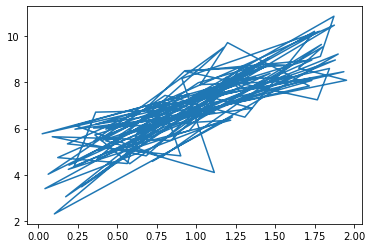

In [37]:
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
import matplotlib.pyplot as plt
plt.plot(X,y)


In [38]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.24079306],
       [2.72008353]])

In [3]:
X_new = np.array([[0], [2]])

In [4]:
X_new

array([[0],
       [2]])

In [5]:
n_epochs = 50
m = 100
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.03019892],
       [3.00473068]])

In [6]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.01936834]), array([3.01086087]))

In [64]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [65]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [66]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
print(lin_reg.intercept_,lin_reg.coef_)

[2.1702741] [[0.96889769 0.50104322]]


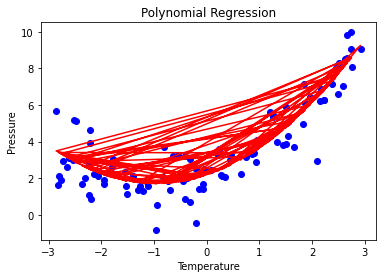

In [67]:
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin_reg.predict(poly_features.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
  
plt.show()

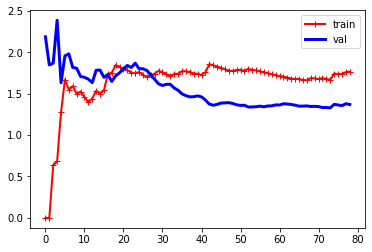

In [68]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

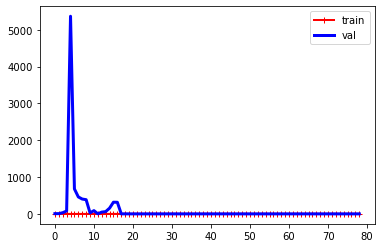

In [69]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

In [70]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.18415077]])

In [71]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.13906387])

In [79]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=10,include_bias=False)),
                        ("std_scalar",StandardScaler())
                       ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1,tol=-np.infty,penalty=None,learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model= None
# X_train_poly_scaled = X_train_poly_scaled.ravel()
print(X_train_poly_scaled.shape)
print(y_train)
print(y_train.ravel())
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val,y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

(80, 10)
[[ 2.0872217 ]
 [ 1.68294773]
 [ 7.96522953]
 [ 1.10804932]
 [ 6.53913664]
 [ 6.66294711]
 [ 2.7214878 ]
 [ 8.41441017]
 [ 3.1691151 ]
 [ 2.17568593]
 [ 1.14082233]
 [ 5.03759764]
 [10.57288776]
 [ 4.4928553 ]
 [ 2.1387294 ]
 [ 1.36735882]
 [ 2.11168432]
 [ 0.7258648 ]
 [ 4.97688044]
 [ 3.03515172]
 [ 3.18598123]
 [ 3.32616164]
 [ 0.36981607]
 [ 0.13708124]
 [ 0.9270866 ]
 [ 2.37219612]
 [ 8.70332399]
 [ 2.03410693]
 [ 2.05573485]
 [ 1.94357761]
 [10.72790591]
 [ 1.61948942]
 [ 3.63506098]
 [ 1.79417256]
 [ 3.506177  ]
 [ 0.21684105]
 [-0.14845291]
 [ 2.16452589]
 [ 1.58329491]
 [ 3.1403576 ]
 [ 2.0338325 ]
 [ 2.00116309]
 [ 1.25349582]
 [ 5.27034371]
 [ 2.77544829]
 [ 0.68979607]
 [ 1.77733458]
 [ 1.66027114]
 [ 0.87331372]
 [ 2.57952045]
 [ 1.88343581]
 [ 2.96255376]
 [ 0.76292071]
 [ 3.33459744]
 [ 2.06206192]
 [ 7.52471236]
 [ 1.93319448]
 [ 4.89910671]
 [ 8.15936243]
 [ 1.83746171]
 [ 2.99409102]
 [ 1.09538923]
 [ 2.27098843]
 [ 3.29403914]
 [ 1.29524432]
 [ 4.72584699]
 